<a href="https://colab.research.google.com/github/abhinav-syl/Image-Classification/blob/main/cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/content/drive/My Drive/Submission/Sign.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/Sign')
zip_ref.close()

In [ ]:
train_cat_dir = os.path.join('/Sign/Sign/forgeries')
train_dog_dir = os.path.join('/Sign/Sign/genuine')
#test_cat_dir = os.path.join('/nn/nn/test/cat')
#test_dog_dir = os.path.join('/nn/nn/test/dog')


In [ ]:
train_cat_name= os.listdir(train_cat_dir)
print(train_cat_name[:3])
train_dog_name= os.listdir(train_dog_dir)
print(train_dog_name[:3])
#test_cat_name= os.listdir(test_cat_dir)
#print(test_cat_name[:3])

['NFI-03905085.png', 'NFI-10004002.png', 'NFI-04306084.png']
['NFI-06204062.png', 'NFI-07108071.png', 'NFI-09703097.png']


In [ ]:
print("length of cat: ", len(os.listdir(train_cat_dir)))
print("length of dog: ", len(os.listdir(train_dog_dir)))

length of cat:  625
length of dog:  940


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img 
datagen = ImageDataGenerator(
          rotation_range = 40,
          shear_range = 0.2,
          zoom_range = 0.2,
          horizontal_flip = True,
          brightness_range = (0.5,1.5))



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrow = 4
ncol = 4

pic_index=0

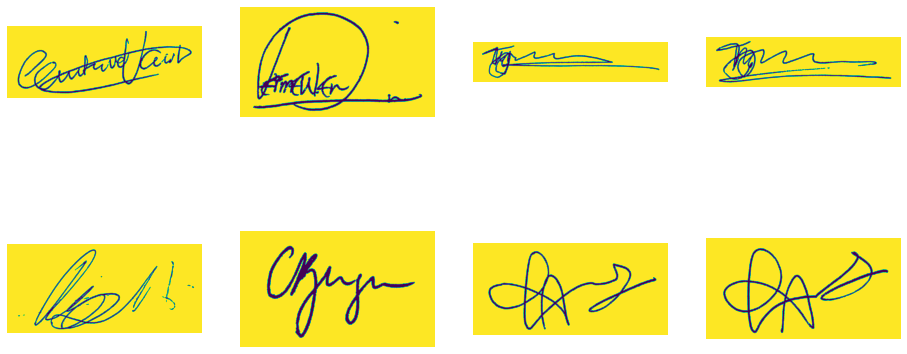

In [ ]:
fig = plt.gcf()
fig.set_size_inches(nrow *4, ncol *4)

pic_index += 4

next_cat_pic = [os.path.join(train_cat_dir, fname)
                for fname in train_cat_name[pic_index-4:pic_index]]
next_dog_pic = [os.path.join(train_dog_dir, fname)
                for fname in train_dog_name[pic_index-4:pic_index]]
for i, img_path in enumerate(next_cat_pic+next_dog_pic):
  ct = plt.subplot(nrow, ncol, i+1)
  ct.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()




In [ ]:


import tensorflow as tf
from keras.utils.vis_utils import plot_model


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

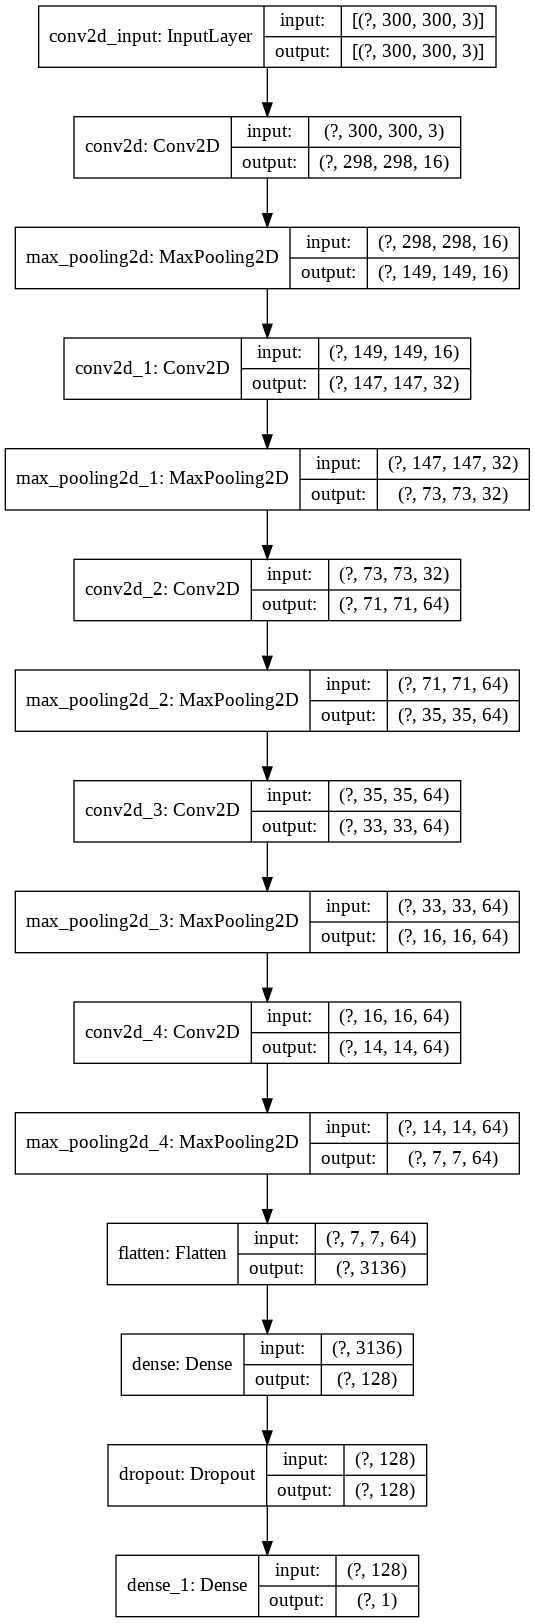

In [ ]:

model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(16,(3,3), activation = "relu", input_shape = (300,300,3)),
     tf.keras.layers.MaxPooling2D(2,2),
     #conv
     tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     #conv3
     tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     #conv4
     tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     #conv5
     tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     #flatten
     tf.keras.layers.Flatten(),
     #dense
     tf.keras.layers.Dense(128,activation= "relu"),
     #Dropout
     tf.keras.layers.Dropout(0.01),
     #output
     tf.keras.layers.Dense(1,activation = 'sigmoid')


])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr = 0.0006),
              metrics = ['acc']
              )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
train_generator = train_datagen.flow_from_directory(
                  '/Sign/Sign',
                  target_size = (300,300),
                  batch_size = 20,
                  class_mode = 'binary'
)
#test_datagen = ImageDataGenerator(rescale = 1/255) 
#test_generator = test_datagen.flow_from_directory(
#                 '/nn/nn/test',
#                 target_size = (300,300),
#                 batch_size = 1,
#                 class_mode = 'binary')


Found 1564 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    epochs = 20,
    steps_per_epoch = 24,
    verbose = 1,
    #validation_data = test_generator
)

Epoch 1/20
24/24 [==============================] - 35s 1s/step - loss: 0.7420 - acc: 0.5194
Epoch 2/20
24/24 [==============================] - 35s 1s/step - loss: 0.6824 - acc: 0.5797
Epoch 3/20
24/24 [==============================] - 36s 1s/step - loss: 0.6839 - acc: 0.5750
Epoch 4/20
24/24 [==============================] - 36s 2s/step - loss: 0.6420 - acc: 0.6458
Epoch 5/20
24/24 [==============================] - 35s 1s/step - loss: 0.6639 - acc: 0.6013
Epoch 6/20
24/24 [==============================] - 35s 1s/step - loss: 0.6772 - acc: 0.6681
Epoch 7/20
24/24 [==============================] - 36s 1s/step - loss: 0.6183 - acc: 0.6958
Epoch 8/20
24/24 [==============================] - 36s 1s/step - loss: 0.5556 - acc: 0.7188
Epoch 9/20
24/24 [==============================] - 36s 2s/step - loss: 0.5169 - acc: 0.7271
Epoch 10/20
24/24 [==============================] - 36s 2s/step - loss: 0.4554 - acc: 0.7854
Epoch 11/20
24/24 [==============================] - 36s 2s/step - lo

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path = path , target_size = (300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 3)
  print(classes[0])
  if(classes[0]>0.5):
    print(fn + " is a cat.")
  else:
    print(fn + " is a dog.")


In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cat_dir, f) for f in train_cat_name]
dog_img_files = [os.path.join(train_dog_dir, f) for f in train_dog_name]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')